In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

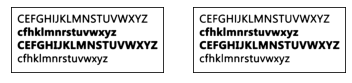

In [2]:
img = cv.imread('files/OCR.jpg',0)
img0 = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img0,80,255,cv.THRESH_BINARY)

images = [img0, th1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

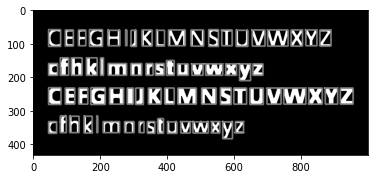

In [3]:
img_2= th1.copy()
img_2 = 255 - img_2

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img_2,kernel,iterations = 2)

contours_2, hierarchy = cv.findContours(erosion, cv.cv2.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# RETR_CCOMP   cv2.RETR_EXTERNAL

alphabets = []
for c in contours_2:
    if len(c)>5:
        x, y, w, h = cv.boundingRect(c)
        cv.rectangle(img_2, (x, y), (x+w, y+h), (127,127,127), 4)
        alphabets.append(255 - th1[y:y+h, x:x+w])
plt.imshow(img_2, cmap='gray')

In [4]:
len(alphabets)

70

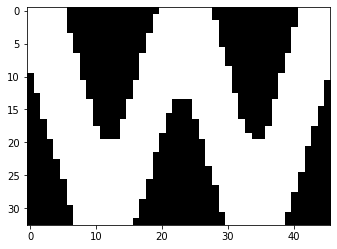

In [5]:
plt.imshow(alphabets[1], cmap='gray')

In [85]:
if not os.path.exists('alphabets'):
    os.makedirs('alphabets')
path = os.path.join(os.getcwd(), 'alphabets')

for i in range(len(alphabets)):
    cv.imwrite(os.path.join(path, f'{i}.jpg'), alphabets[i])